# Mini Neu
### Only Numpy , Pandas , Matplotlib allowed

In this project, you'll build your first neural network and use it to predict daily bike rental ridership.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata/Bike-Sharing-Dataset')  # Fix This if your file is in a Certain Directory in Your Drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### 1- Load the "Hours csv" File into a pandas dataframe

In [ ]:
rides =pd.read_csv('hour.csv')

### 2- Show the Head of the Data

In [ ]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Let me Show you a Peek on the Data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

<AxesSubplot:xlabel='dteday'>

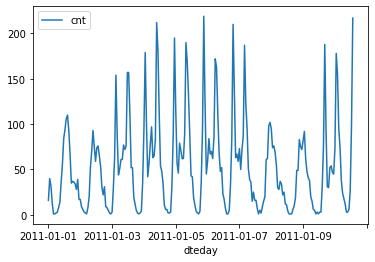

In [ ]:
# A Pandas Plot
rides[:24*10].plot(x='dteday', y='cnt')

In [ ]:
feature=[ 'season'	, 'yr',	'mnth'	, 'hr'	, 'holiday' , 	'weekday'	, 'workingday'	, 'weathersit']
for col in feature:
    print(rides[col].value_counts())
    print("****"*10)

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
****************************************
1    8734
0    8645
Name: yr, dtype: int64
****************************************
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64
****************************************
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
****************************************
0    16879
1      500
Name: holiday, dtype: int64
****************************************
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64
****************************************
1    11865
0     5514
Name: workingday, dtype: int64
***********************

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [ ]:
None    # Some times you need to tell which columns you need to get dummies  df = pd.get_dummies(df, columns=dummy_cols)
rides = pd.get_dummies(rides,drop_first=True,columns=[ 'season'	,	'mnth'	, 'hr' , 	'weekday'	, 'weathersit'])

In [ ]:
rides.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,0,1,0,0,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,0,1,0,0,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,0,1,0,0,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,0,1,0,0,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,0,1,0,0,0


#### Drop Un Necessary Columns

In [ ]:
rides.drop(['instant'],axis = 1, inplace= True)
rides.drop(['dteday'],axis = 1, inplace= True)
rides.drop(['casual'],axis = 1, inplace= True)
rides.drop(['registered'],axis = 1, inplace= True)

#### Show Cleaned Data

In [ ]:
rides

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0000,16,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,40,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,32,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,13,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,119,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,89,0,0,...,0,1,0,0,0,0,0,1,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,90,0,0,...,0,1,0,0,0,0,0,0,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,61,0,0,...,0,1,0,0,0,0,0,0,0,0


### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [ ]:
quant_features = [ 'cnt','temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = rides[each].mean(), rides[each].std()
    scaled_features[each] = [mean, std]
    # STANDARDIZE
    rides.loc[:, each] = (rides[each] - mean ) /std

In [ ]:
rides

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,-1.334609,0.2879,0.947345,-1.553844,-0.956312,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,-1.438475,0.2727,0.895513,-1.553844,-0.823998,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,-1.438475,0.2727,0.895513,-1.553844,-0.868103,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,-1.334609,0.2879,0.636351,-1.553844,-0.972851,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,-1.334609,0.2879,0.636351,-1.553844,-1.039008,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,-1.230743,0.2576,-0.141133,-0.211685,-0.388467,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,1,0,1,-1.230743,0.2576,-0.141133,-0.211685,-0.553859,0,0,...,0,1,0,0,0,0,0,1,0,0
17376,1,0,1,-1.230743,0.2576,-0.141133,-0.211685,-0.548346,0,0,...,0,1,0,0,0,0,0,0,0,0
17377,1,0,1,-1.230743,0.2727,-0.348463,-0.456086,-0.708224,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [ ]:
# Save the last 21 days
test_data = rides[-21*24:] #  For Testing
data = rides[:-21*24]      # For Training

# Separate the data into features and targets
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [ ]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

In [ ]:
# Hint save it for later
# From List To 2D Array
a = np.array([1,2,3,4], ndmin=2).T
a

array([[1],
       [2],
       [3],
       [4]])

#### Build Sigmoid Function

![sigmoid-equation.png](attachment:sigmoid-equation.png)

In [ ]:
def sigmoid(x):
 # x = x.astype('float128')
  return  1/(1 + np.exp(-x))

In [ ]:
#Test it
x= 0.9
sigmoid(x)
# Output should be 0.622 for X = 0.5
# Output should be 0.71 for X = 0.9

0.7109495026250039

In [ ]:
class NeuralNetwork():
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):


        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights

        # Lets Set Layer Weights with Mean = 0 and Std = 1/sqrt(Next Layer Number of Nodes)
        # The Matrix Shape  of Weights is based on the Current Layer and the Next Layer

        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5,
                                       (self.output_nodes, self.hidden_nodes))
        self.lr =learning_rate

        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function

        self.activation_function =sigmoid

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array  USE THE HINT
        inputs = np.array(inputs_list, ndmin=2).T
        # Convert Outputs  list to 2d array USE THE HINT
        targets = np.array(targets_list, ndmin=2).T
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer

        #The Heirarchy
        # We have already inputs
        # And we calculated input to Hidden Weights
        # So we need firstly to  Apply the Dot Product between These Weights and our inputs  and the result be the Hidden inputs
        hidden_inputs = np.dot(self.weights_input_to_hidden , inputs)
        # Then We need to use Activation Function on the Hidden input to produce the Hidden Output
        hidden_outputs = self.activation_function(hidden_inputs)
        #print(hidden_outputs)
        # TODO: Output layer
        # Repat what we did but now we need to use the Weights of Hidden to Output with the Hidden outputs
        final_inputs =np.dot(self.weights_hidden_to_output , hidden_outputs )
        # Here Actually the Final Outputs layer value is the Final Inputs Cause its Regression output
        final_outputs = final_inputs

        #### Implement the backward pass here ####
        ### Backward pass ###

        #TODO: Output error
        #Subtract Values our Prediction and The Truth

        output_errors = targets -final_outputs

        # TODO: Backpropagated error
         #Now We are going from Back to Forth So we will take the  transposed Weights of hidden to output with the output errors in Dot Product
        hidden_errors = np.dot(output_errors, self.weights_hidden_to_output).T
        # and  here we will calculate Gradient let me do it for you
        hidden_grad = hidden_errors *  ((hidden_outputs)*(1-hidden_outputs))

        # TODO: Update the weights

        #Fill this by yourself
        self.weights_hidden_to_output += (self.lr) * (hidden_outputs.T *  output_errors)
        self.weights_input_to_hidden += (self.lr) * (( inputs.T * hidden_grad))


    def run(self, inputs_list):
        # Run a forward pass through the network
        # You have done it before
        # Convery inputs lits to 2D Array  use the Hint
        inputs = np.array(inputs_list, ndmin=2).T

        #### Implement the forward pass here ####
        # TODO: Hidden layer

        hidden_inputs = np.dot(self.weights_input_to_hidden , inputs)
        hidden_outputs =self.activation_function(hidden_inputs)

        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output , hidden_outputs)
        final_outputs = final_inputs

        return final_outputs

In [ ]:
def MSE(y, Y):
    mm= np.mean((y-Y)**2)
    print(mm)
    return mm

## Training the network

In [ ]:
import sys

### Set the hyperparameters here ###
epochs = 5000
learning_rate = 0.01
hidden_nodes = 28
output_nodes = 1

In [ ]:
N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}


for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.loc[batch].values,train_targets.loc[batch]['cnt']):
        network.train(record, target)

    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])

    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
print('')
print('Finally')
print("Finished training.")

Streaming output truncated to the last 5000 lines.
0.16544040596917597
Progress: 50.0% ... Training loss: 0.067 ... Validation loss: 0.1650.066300277440734
0.17095699611826032
Progress: 50.0% ... Training loss: 0.066 ... Validation loss: 0.1700.0704623690818287
0.20931089217014862
Progress: 50.0% ... Training loss: 0.070 ... Validation loss: 0.2090.06583650162892823
0.1796666369332
Progress: 50.0% ... Training loss: 0.065 ... Validation loss: 0.1790.06853754192923273
0.169255544654163
Progress: 50.1% ... Training loss: 0.068 ... Validation loss: 0.1690.06626335882943409
0.15946574032538607
Progress: 50.1% ... Training loss: 0.066 ... Validation loss: 0.1590.08675357948198983
0.16844822800207318
Progress: 50.1% ... Training loss: 0.086 ... Validation loss: 0.1680.07474964620924213
0.15803671557416543
Progress: 50.1% ... Training loss: 0.074 ... Validation loss: 0.1580.06804717072464626
0.15795221423698913
Progress: 50.1% ... Training loss: 0.068 ... Validation loss: 0.1570.0648496896830

(0.0018055289219656226, 2.0)

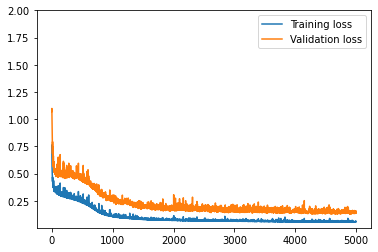

In [ ]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=2)

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

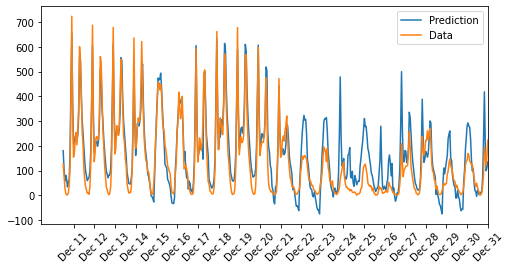

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
rides =pd.read_csv('hour.csv')
mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)